In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("D:/Labs/performance.csv",sep=",")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
willOneHotEncode = ["gender"]
for item in willOneHotEncode:
    df = pd.concat([df,pd.get_dummies(df[item],prefix=item)],axis=1)
    df = df.drop(columns=[item])
class_nums = {"class":   {"A": 0, "B": 1, "C":2, "D":3,}}
df = df.replace(class_nums)
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1


In [4]:
minMaxScaler = MinMaxScaler()
df_enc = pd.DataFrame(minMaxScaler.fit_transform(df))
df_enc.shape

(13393, 13)

In [5]:
x = df_enc
y = pd.DataFrame(df['class'],columns=['class'])

In [7]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3)
yTrain = pd.get_dummies(data=yTrain,columns =['class'])
yTest = pd.get_dummies(data=yTest,columns =['class'])

In [11]:
model_nn = keras.Sequential([keras.layers.Dense(10,kernel_initializer = 'he_uniform',input_shape=(13,),activation = 'relu'),
                            keras.layers.Dense(20,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(15,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(4,kernel_initializer = 'glorot_uniform',activation = 'softmax'),
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "categorical_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 20, callbacks = es)

Epoch 1/20
293/293 [==============================] - 1s 3ms/step - loss: 0.7436 - accuracy: 0.7873 - val_loss: 0.1712 - val_accuracy: 1.0000
Epoch 2/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9998 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 3/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9999 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9999 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/20
293/293 [==============================] - 1s 2ms/step - loss: 9.5633e-04 - accuracy: 1.0000 - val_loss: 7.4932e-04 - val_accuracy: 1.000

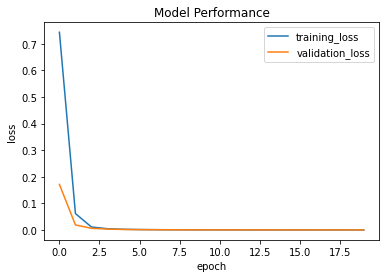

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()